# Data preparation & preliminary analysis

The first part of this notebook consists of various steps that were taken to prepare and clean up the data. The second part contains the preliminary analysis of data

### Data preparation

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
growth = pd.read_csv('wzrost.csv',sep='\t')

d = {}
d['month'] = []
d['growth'] = []
for year in growth['year']:
    for q in range(0,4):
        for mon in range(1,4):
            d['month'].append(f"{year}-{q*3 + mon if q*3 + mon > 9 else '0' + str(q*3 + mon)}")
            d['growth'].append(growth[growth["year"] == year][f"q{q+1}"].reset_index(drop=True).loc[0].replace(',','.'))

growth = pd.DataFrame(data=d)
growth["month"] = growth["month"].map(str)
growth

,month,growth
0,2022-01,8.8
1,2022-02,8.8
2,2022-03,8.8
3,2022-04,6.1
4,2022-05,6.1
...,...,...
235,2003-08,4.7
236,2003-09,4.7
237,2003-10,4.7
238,2003-11,4.7


In [3]:
wig = pd.read_csv('wig_d.csv',sep=',')
wig['month'] = wig['Data'].str[:7]
wig = wig.groupby(['month']).mean().reset_index()
wig['wig'] = wig['Zamkniecie']
del wig["Otwarcie"]
del wig["Najwyzszy"]
del wig["Najnizszy"]
del wig["Wolumen"]
del wig['Zamkniecie']
wig

,month,wig
0,1991-04,971.100000
1,1991-05,954.066667
2,1991-06,911.700000
3,1991-07,854.140000
4,1991-08,765.600000
...,...,...
382,2023-02,60249.230500
383,2023-03,58334.809565
384,2023-04,61235.281111
385,2023-05,63716.019524


In [4]:
wig20 = pd.read_csv('wig20_d.csv',sep=',')
wig20['month'] = wig20['Data'].str[:7]
wig20 = wig20.groupby(['month']).mean().reset_index()
wig20['wig20'] = wig20['Zamkniecie']
del wig20["Otwarcie"]
del wig20["Najwyzszy"]
del wig20["Najnizszy"]
del wig20["Wolumen"]
del wig20["Zamkniecie"]
wig20

,month,wig20
0,1991-04,96.400000
1,1991-05,94.333333
2,1991-06,90.150000
3,1991-07,84.460000
4,1991-08,75.675000
...,...,...
382,2023-02,1856.112000
383,2023-03,1758.320435
384,2023-04,1854.654444
385,2023-05,1943.633333


In [5]:
usd = pd.read_csv('moneypl.csv')
usd['month'] = usd['Data'].str[:7]
usd['usd'] = usd['Kurs sredni']
del usd["Zmiana"]
del usd["Tabela"]
del usd["Data"]
del usd["Kurs sredni"]
usd = usd.groupby(['month']).mean().reset_index()
usd

,month,usd
0,1970-01,3.121176
1,2001-09,4.213973
2,2001-10,4.136539
3,2001-11,4.091186
4,2001-12,4.015516
...,...,...
258,2023-02,4.426830
259,2023-03,4.383657
260,2023-04,4.230079
261,2023-05,4.176362


In [6]:
budget = pd.read_csv('budget.csv',sep=";")
budget = budget.transpose()
budget = budget.set_axis(['month', 'income', 'expenses', 'score'], axis=1, inplace=False)
budget = budget.dropna().reset_index()
budget["year"] = budget["index"].map(str).str[:4]
budget["month"] = budget["year"] + '-' + budget["month"].map(int).map(lambda x: str(x) if x > 9 else f"0{x}")
del budget["index"]
del budget["year"]
budget

,month,income,expenses,score
0,2000-01,10914.1,12038.6,-1124.5
1,2000-02,20240.9,24992.2,-4751.3
2,2000-03,30949.7,37877.1,-6927.4
3,2000-04,40954.2,49737.2,-8783.0
4,2000-05,51761.7,61809.2,-10047.4
...,...,...,...,...
274,2022-11,464528.6,446252.4,18276.2
275,2022-12,504968.2,517399.0,-12430.8
276,2023-01,54542.7,43310.3,11232.3
277,2023-02,93140.1,93187.5,-47.4


In [7]:
work = pd.read_csv('work.csv',sep=";")
work_col_names = work["﻿Wskaznik"]
work_col_names_2 = work["Jednostka"]
work = work.transpose()
work = work.reset_index()
work["year"] = work["index"].map(str).str[:4]
work["month"] = work["year"] + '-' + work[0].map(lambda x: int(x) if float(x) > 0 else 0).map(lambda x: str(x) if x > 9 else f"0{x}")
del work["index"]
del work["year"]
del work[0]
work = work[3:]
work_col_names = list(map(lambda x: ' '.join(x.split(" ")[0:2]) if isinstance(x,str) else str(x),work_col_names))
new_names = [str(title1) + " " + str(title2) for title1,title2 in zip(work_col_names,work_col_names_2)][1:]
new_names.append('month')
work = work.set_axis(new_names, axis=1, inplace=False)
work = work.dropna(axis=1)
work = work.set_axis(["unemployed","unemployed_year","unemployed_month","unemployment","month"], axis=1, inplace=False)
work

,unemployed,unemployed_year,unemployed_month,unemployment,month
3,2476.1,121.0,105.4,13.7,2000-01
4,2525.8,117.7,102.0,14.0,2000-02
5,2531.7,116.6,100.2,14.0,2000-03
6,2487.9,117.2,98.3,13.8,2000-04
7,2445.4,118.0,98.3,13.6,2000-05
...,...,...,...,...,...
278,812.3,90.7,101.5,5.2,2022-12
279,857.6,92.5,105.6,5.5,2023-01
280,864.8,93.8,100.8,5.5,2023-02
281,846.9,93.9,97.9,5.4,2023-03


In [2]:
prices = pd.read_csv('prices.csv',sep=";")
prices_col_names = list(prices["﻿Wskaźnik"])
prices_col_names_1 = ["index"]
prices_col_names_1.extend(prices_col_names)
prices_col_names_1[1] = "mon"
prices_col_names_2 = prices["Jednostka"]
prices_col_names_3 = ["index"]
prices_col_names_3.extend(prices_col_names_2)
prices_col_names_3[1] = "th"
prices_col_names_4 = prices["Unnamed: 1"]
prices_col_names_5 = ["index"]
prices_col_names_5.extend(prices_col_names_4)
prices_col_names_5[1] = "th"
new_names = [str(title1) + " " + str(title2) if title1 != "Wskaźniki cen towarów i usług konsumpcyjnych" else str(title1) + " " + str(title3) + " " + str(title2) for title1,title2,title3 in zip(prices_col_names_1,prices_col_names_3,prices_col_names_5)]
prices = prices.transpose()
prices = prices.reset_index()
prices = prices.set_axis(new_names, axis=1, inplace=False)
prices["year"] = prices["index index"].map(str).str[:4]
prices["month"] = prices["year"] + '-' + prices["mon th"].map(lambda x: int(x) if float(x) > 0 else 0).map(lambda x: str(x) if x > 9 else f"0{x}")
del prices["index index"]
del prices["year"]
del prices["mon th"]
prices = prices[3:]
prices = prices.dropna(axis=1)

for col_name in prices.columns:
    if "grudzień" in col_name:
        del prices[col_name]

prices

,Wskaźniki cen skupu pszenicy (bez ziarna siewnego) analogiczny okres roku poprzedniego=100,Wskaźniki cen skupu pszenicy (bez ziarna siewnego) okres poprzedni=100,Wskaźniki cen skupu żyta (bez ziarna siewnego) analogiczny okres roku poprzedniego=100,Wskaźniki cen skupu żyta (bez ziarna siewnego) okres poprzedni=100,Wskaźniki cen skupu bydła (bez cieląt) analogiczny okres roku poprzedniego=100,Wskaźniki cen skupu bydła (bez cieląt) okres poprzedni=100,Wskaźniki cen skupu trzody chlewnej analogiczny okres roku poprzedniego=100,Wskaźniki cen skupu trzody chlewnej okres poprzedni=100,Wskaźniki cen skupu mleka analogiczny okres roku poprzedniego=100,Wskaźniki cen skupu mleka okres poprzedni=100,...,Wskaźniki cen towarów i usług konsumpcyjnych zdrowie okres poprzedni=100,Wskaźniki cen towarów i usług konsumpcyjnych transport analogiczny okres roku poprzedniego=100,Wskaźniki cen towarów i usług konsumpcyjnych transport okres poprzedni=100,Wskaźniki cen towarów i usług konsumpcyjnych łączność analogiczny okres roku poprzedniego=100,Wskaźniki cen towarów i usług konsumpcyjnych łączność okres poprzedni=100,Wskaźniki cen towarów i usług konsumpcyjnych rekreacja i kultura analogiczny okres roku poprzedniego=100,Wskaźniki cen towarów i usług konsumpcyjnych rekreacja i kultura okres poprzedni=100,Wskaźniki cen towarów i usług konsumpcyjnych edukacja analogiczny okres roku poprzedniego=100,Wskaźniki cen towarów i usług konsumpcyjnych edukacja okres poprzedni=100,month
3,123.0,109.1,135.4,108.0,102.2,101.6,128.8,98.8,120.4,102.3,...,103.1,124.7,102.0,107.6,107.6,110.9,102.1,113.9,100.3,2000-01
4,127.8,102.2,135.1,101.1,103.2,102.5,107.1,98.0,124.6,102.5,...,100.9,125.8,101.4,107.1,99.8,110.4,100.6,113.8,100.3,2000-02
5,125.9,100.6,134.7,99.5,104.3,102.2,114.5,104.0,126.9,102.5,...,100.9,126.6,102.4,109.4,102.1,110.2,100.4,113.5,100.2,2000-03
6,125.3,100.8,133.2,98.9,106.3,100.7,119.0,105.2,128.1,100.8,...,100.4,122.5,99.7,102.0,94.4,110.0,100.4,113.3,100.1,2000-04
7,133.4,108.2,138.0,103.9,108.2,100.0,125.9,104.1,130.9,98.9,...,100.5,122.7,102.2,99.3,100.0,109.6,100.4,113.0,100.1,2000-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,111.6,95.7,104.6,93.2,116.4,100.6,170.8,106.0,149.6,101.9,...,100.5,113.3,100.0,104.9,99.9,114.7,101.2,113.8,100.2,2022-12
279,105.2,91.8,97.4,93.2,113.6,99.8,167.2,96.4,134.2,89.1,...,101.7,116.5,98.8,106.3,101.4,116.7,102.4,113.9,101.4,2023-01
280,102.0,95.8,91.7,94.1,112.0,100.3,190.2,110.3,123.4,92.6,...,100.7,123.7,101.1,107.8,102.9,116.0,102.3,114.0,100.7,2023-02
281,77.5,91.2,80.4,95.6,101.2,98.8,131.2,102.9,113.3,97.9,...,100.8,103.9,99.1,109.4,101.7,116.4,99.7,114.1,100.5,2023-03


In [9]:
def add_period_month(df,col):
    df = df.sort_values("month")
    df = df.reset_index(drop=True)
    new_col = [None]
    for index,value in enumerate(df[col]):
        if index == 0:
            continue
        new_col.append((float(df[col][index])/float(df[col][index-1]))*100)
        
    df[f"{col}_1m"] = new_col
    return df

In [10]:
def add_period_year(df,col):
    df = df.sort_values("month")
    df = df.reset_index(drop=True)
    new_col = []
    for index,value in enumerate(df[col]):
        if index < 12:
            new_col.append(None)
            continue
        new_col.append((float(df[col][index])/float(df[col][index-12]))*100)
        
    df[f"{col}_1y"] = new_col
    return df

In [11]:
wig = add_period_month(wig,'wig')
wig20 = add_period_month(wig20,'wig20')
usd = add_period_month(usd,'usd')
budget = add_period_month(budget,'income')
budget = add_period_month(budget,'expenses')
budget = add_period_month(budget,'score')
work = add_period_month(work,'unemployment')

In [12]:
wig = add_period_year(wig,'wig')
wig20 = add_period_year(wig20,'wig20')
usd = add_period_year(usd,'usd')
budget = add_period_year(budget,'income')
budget = add_period_year(budget,'expenses')
budget = add_period_year(budget,'score')
work = add_period_year(work,'unemployment')

In [13]:
data = pd.merge(growth.assign(month=growth.month.astype(str)), 
         wig.assign(month=wig.month.astype(str)), 
         how='left', on='month')
data = pd.merge(data.assign(month=data.month.astype(str)), 
         wig20.assign(month=wig20.month.astype(str)), 
         how='left', on='month')
data = pd.merge(data.assign(month=data.month.astype(str)), 
         usd.assign(month=usd.month.astype(str)), 
         how='left', on='month')
data = pd.merge(data.assign(month=data.month.astype(str)), 
         budget.assign(month=budget.month.astype(str)), 
         how='left', on='month')
data = pd.merge(data.assign(month=data.month.astype(str)), 
         work.assign(month=work.month.astype(str)), 
         how='left', on='month')
data = pd.merge(data.assign(month=data.month.astype(str)), 
         prices.assign(month=prices.month.astype(str)), 
         how='left', on='month')
data

,month,growth,wig,wig_1m,wig_1y,wig20,wig20_1m,wig20_1y,usd,usd_1m,...,Wskaźniki cen towarów i usług konsumpcyjnych zdrowie analogiczny okres roku poprzedniego=100,Wskaźniki cen towarów i usług konsumpcyjnych zdrowie okres poprzedni=100,Wskaźniki cen towarów i usług konsumpcyjnych transport analogiczny okres roku poprzedniego=100,Wskaźniki cen towarów i usług konsumpcyjnych transport okres poprzedni=100,Wskaźniki cen towarów i usług konsumpcyjnych łączność analogiczny okres roku poprzedniego=100,Wskaźniki cen towarów i usług konsumpcyjnych łączność okres poprzedni=100,Wskaźniki cen towarów i usług konsumpcyjnych rekreacja i kultura analogiczny okres roku poprzedniego=100,Wskaźniki cen towarów i usług konsumpcyjnych rekreacja i kultura okres poprzedni=100,Wskaźniki cen towarów i usług konsumpcyjnych edukacja analogiczny okres roku poprzedniego=100,Wskaźniki cen towarów i usług konsumpcyjnych edukacja okres poprzedni=100
0,2022-01,8.8,70036.753000,102.857636,120.384578,2293.039000,103.596212,114.636595,4.020220,98.426036,...,103.7,100.4,117.2,97.2,104.0,100.0,107.1,101.1,105.2,101.2
1,2022-02,8.8,65677.865500,93.776286,113.811560,2141.349000,93.384761,109.676349,4.013855,99.841675,...,104.6,101.2,109.9,95.4,105.4,101.4,108.6,102.7,105.6,100.7
2,2022-03,8.8,62270.581739,94.812128,106.990358,2052.743913,95.862184,105.169072,4.315365,107.511737,...,106.0,101.3,124.1,117.5,103.0,100.3,107.4,99.6,106.0,100.4
3,2022-04,6.1,62403.172105,100.212926,104.406449,2036.252632,99.196623,101.838881,4.295355,99.536303,...,106.5,100.6,121.1,100.0,102.6,100.1,109.3,102.0,106.3,100.4
4,2022-05,6.1,55821.584762,89.453121,88.483275,1785.555238,87.688296,84.074635,4.394171,102.300542,...,107.2,101.4,125.8,103.4,103.6,100.0,110.3,100.9,106.6,100.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,2003-08,4.7,19431.615000,112.972707,148.433189,1476.771000,110.413467,135.240511,3.918610,100.384852,...,101.5,100.1,103.8,101.0,100.0,100.0,101.9,100.0,102.4,100.0
236,2003-09,4.7,20351.063636,104.731715,155.631836,1561.299091,105.723846,145.312307,3.979191,101.545980,...,101.4,100.1,103.2,100.5,100.0,100.0,101.8,99.8,102.3,100.2
237,2003-10,4.7,20671.217391,101.573155,154.698401,1583.883913,101.446540,143.007107,3.923991,98.612793,...,101.3,100.0,102.3,100.0,100.0,100.0,101.6,99.8,102.2,101.5
238,2003-11,4.7,19861.384211,96.082315,139.778291,1507.513158,95.178261,127.953446,3.944321,100.518089,...,101.1,100.0,102.8,100.4,100.0,100.0,101.7,99.9,102.1,100.1


In [20]:
data = data.sort_values('month')
data["inflation"] = data["Wskaźniki cen towarów i usług konsumpcyjnych nan analogiczny okres roku poprzedniego=100"]
data

,month,growth,wig,wig_1m,wig_1y,wig20,wig20_1m,wig20_1y,usd,usd_1m,...,Wskaźniki cen towarów i usług konsumpcyjnych zdrowie okres poprzedni=100,Wskaźniki cen towarów i usług konsumpcyjnych transport analogiczny okres roku poprzedniego=100,Wskaźniki cen towarów i usług konsumpcyjnych transport okres poprzedni=100,Wskaźniki cen towarów i usług konsumpcyjnych łączność analogiczny okres roku poprzedniego=100,Wskaźniki cen towarów i usług konsumpcyjnych łączność okres poprzedni=100,Wskaźniki cen towarów i usług konsumpcyjnych rekreacja i kultura analogiczny okres roku poprzedniego=100,Wskaźniki cen towarów i usług konsumpcyjnych rekreacja i kultura okres poprzedni=100,Wskaźniki cen towarów i usług konsumpcyjnych edukacja analogiczny okres roku poprzedniego=100,Wskaźniki cen towarów i usług konsumpcyjnych edukacja okres poprzedni=100,inflation
228,2003-01,2.2,14501.390909,99.758368,92.895081,1182.224091,98.709599,84.840768,3.830805,97.883917,...,100.2,105.7,101.3,100.0,100.0,101.7,101.0,102.4,100.1,100.5
229,2003-02,2.2,13852.175000,95.523078,90.203868,1107.944000,93.716920,80.845211,3.866615,100.934802,...,100.2,107.5,101.7,100.0,100.0,101.6,100.1,102.4,100.1,100.5
230,2003-03,2.2,13818.895238,99.759751,91.043731,1101.812857,99.446620,81.021400,4.009524,103.695967,...,100.2,108.5,101.5,100.0,100.0,101.9,100.4,102.4,100.0,100.6
231,2003-04,3.8,14236.020000,103.018510,94.652201,1125.743500,102.171934,84.595694,3.963290,98.846912,...,100.1,106.5,99.5,100.0,100.0,101.9,100.0,102.4,100.0,100.3
232,2003-05,3.8,14842.295238,104.258741,96.847212,1157.359048,102.808415,86.214281,3.741419,94.401838,...,100.1,104.7,98.2,100.0,100.0,101.9,100.0,102.4,100.0,100.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,2022-08,3.9,53965.914545,101.445456,78.326615,1662.664545,99.173530,72.561395,4.665650,99.550351,...,100.6,119.5,94.9,104.3,100.0,112.6,101.1,106.9,100.2,116.1
8,2022-09,3.9,48962.650000,90.728843,69.092537,1483.501364,89.224334,63.348383,4.788236,102.627423,...,100.7,116.4,98.5,102.9,101.0,113.9,100.8,112.5,107.4,117.2
9,2022-10,2.3,47364.929048,96.736858,64.493467,1427.012381,96.192185,59.111930,4.889443,102.113649,...,100.7,117.3,103.1,103.3,100.0,114.8,100.7,113.5,102.0,117.9
10,2022-11,2.3,54522.466500,115.111471,76.647247,1691.497000,118.534150,73.247619,4.602995,94.141503,...,100.6,114.4,99.2,105.0,101.3,114.2,100.4,113.6,100.2,117.5


In [21]:
for col_name in data.columns:
    if col_name == "month":
        continue
    data[col_name] = pd.to_numeric(data[col_name])    
    

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240 entries, 228 to 11
Data columns (total 59 columns):
 #   Column                                                                                                                                           Non-Null Count  Dtype  
---  ------                                                                                                                                           --------------  -----  
 0   month                                                                                                                                            240 non-null    object 
 1   growth                                                                                                                                           240 non-null    float64
 2   wig                                                                                                                                              240 non-null    float64
 3   wig_1m             

## Analysis

In [23]:
data.describe()

,growth,wig,wig_1m,wig_1y,wig20,wig20_1m,wig20_1y,usd,usd_1m,usd_1y,...,Wskaźniki cen towarów i usług konsumpcyjnych zdrowie okres poprzedni=100,Wskaźniki cen towarów i usług konsumpcyjnych transport analogiczny okres roku poprzedniego=100,Wskaźniki cen towarów i usług konsumpcyjnych transport okres poprzedni=100,Wskaźniki cen towarów i usług konsumpcyjnych łączność analogiczny okres roku poprzedniego=100,Wskaźniki cen towarów i usług konsumpcyjnych łączność okres poprzedni=100,Wskaźniki cen towarów i usług konsumpcyjnych rekreacja i kultura analogiczny okres roku poprzedniego=100,Wskaźniki cen towarów i usług konsumpcyjnych rekreacja i kultura okres poprzedni=100,Wskaźniki cen towarów i usług konsumpcyjnych edukacja analogiczny okres roku poprzedniego=100,Wskaźniki cen towarów i usług konsumpcyjnych edukacja okres poprzedni=100,inflation
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,...,240.000000,240.000000,240.000000,240.000000,240.000000,240.00000,240.000000,240.000000,240.000000,240.000000
mean,3.862500,46300.036035,100.702576,110.458855,2262.100076,100.304028,104.850778,3.444807,100.102614,101.300666,...,100.227083,103.088333,100.257083,100.060000,100.017083,101.65125,100.154583,102.629167,100.238750,102.815833
std,2.571653,13247.312882,5.120457,26.454098,512.751823,5.280186,24.391913,0.515600,3.249187,13.726469,...,0.426595,7.585730,2.012542,3.107849,0.844871,2.91167,0.716555,2.834365,0.822054,3.247116
min,-8.300000,13818.895238,76.171261,46.493071,1101.812857,75.017652,47.677664,2.067883,93.359064,75.263531,...,97.400000,87.200000,94.900000,88.300000,95.100000,96.90000,97.600000,93.700000,93.100000,98.400000
25%,2.950000,39439.377250,97.897301,91.753342,1908.316729,97.412286,86.308092,3.071519,98.302931,93.195713,...,100.100000,98.200000,99.300000,98.700000,99.900000,100.30000,99.775000,101.475000,100.000000,101.000000
50%,3.900000,47843.346841,101.298661,110.767091,2276.925397,100.832214,103.982999,3.414259,99.832517,99.778667,...,100.200000,102.650000,100.300000,100.000000,100.000000,101.20000,100.100000,102.600000,100.100000,102.300000
75%,5.100000,56657.904701,103.556079,130.708670,2456.364125,103.307885,122.431759,3.837191,101.690574,106.791251,...,100.400000,107.350000,101.125000,101.700000,100.025000,102.40000,100.500000,104.000000,100.200000,103.800000
max,11.100000,73441.437619,116.194585,175.732256,3826.026087,118.534150,164.454760,4.889443,114.686477,155.670168,...,102.300000,133.400000,117.500000,107.600000,104.800000,114.80000,103.400000,113.800000,107.400000,117.900000


We were able to gather data for period from 2003 to 2022 inclusive. To be more precise, we have data for 240 months consisting of various economical features. There are no null values in this period

Because of high dimensionality the data for analysis was split into two parts. First all features other than prices will be analysed. That is because over half of features are price indicators, one of which is the target variable (inflation). Target variable is also included in the analysis in the first part of dataset

In [29]:
small_data = data.copy()
for col_name in small_data.columns:
    if "Wskaźniki" in col_name:
        del small_data[col_name]
        
small_data

,month,growth,wig,wig_1m,wig_1y,wig20,wig20_1m,wig20_1y,usd,usd_1m,...,income_1y,expenses_1y,score_1y,unemployed,unemployed_year,unemployed_month,unemployment,unemployment_1m,unemployment_1y,inflation
228,2003-01,2.2,14501.390909,99.758368,92.895081,1182.224091,98.709599,84.840768,3.830805,97.883917,...,113.804474,91.232463,58.004940,3320.6,102.1,103.2,20.6,114.444444,113.812155,100.5
229,2003-02,2.2,13852.175000,95.523078,90.203868,1107.944000,93.716920,80.845211,3.866615,100.934802,...,105.984884,97.766662,85.140880,3344.2,102.0,100.7,20.7,100.485437,113.736264,100.5
230,2003-03,2.2,13818.895238,99.759751,91.043731,1101.812857,99.446620,81.021400,4.009524,103.695967,...,106.783628,102.336724,93.875329,3321.0,101.9,99.3,20.6,99.516908,113.186813,100.6
231,2003-04,3.8,14236.020000,103.018510,94.652201,1125.743500,102.171934,84.595694,3.963290,98.846912,...,107.151174,101.809143,90.172168,3246.1,101.3,97.7,20.3,98.543689,113.407821,100.3
232,2003-05,3.8,14842.295238,104.258741,96.847212,1157.359048,102.808415,86.214281,3.741419,94.401838,...,105.925522,104.450194,101.014162,3159.6,103.1,97.3,19.8,97.536946,114.450867,100.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,2022-08,3.9,53965.914545,101.445456,78.326615,1662.664545,99.173530,72.561395,4.665650,99.550351,...,107.811226,114.759068,63.475161,806.9,84.0,99.6,5.2,100.000000,83.870968,116.1
8,2022-09,3.9,48962.650000,90.728843,69.092537,1483.501364,89.224334,63.348383,4.788236,102.627423,...,106.402357,113.819484,57.697763,801.7,85.8,99.3,5.1,98.076923,83.606557,117.2
9,2022-10,2.3,47364.929048,96.736858,64.493467,1427.012381,96.192185,59.111930,4.889443,102.113649,...,104.996851,112.698352,52.487372,796.0,87.4,99.3,5.1,100.000000,86.440678,117.9
10,2022-11,2.3,54522.466500,115.111471,76.647247,1691.497000,118.534150,73.247619,4.602995,94.141503,...,102.898320,111.267407,36.275833,800.2,89.0,100.5,5.1,100.000000,87.931034,117.5


In [30]:
small_data.describe()

,growth,wig,wig_1m,wig_1y,wig20,wig20_1m,wig20_1y,usd,usd_1m,usd_1y,...,income_1y,expenses_1y,score_1y,unemployed,unemployed_year,unemployed_month,unemployment,unemployment_1m,unemployment_1y,inflation
count,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,...,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,3.862500,46300.036035,100.702576,110.458855,2262.100076,100.304028,104.850778,3.444807,100.102614,101.300666,...,107.471579,105.004664,188.324985,1801.205417,94.363750,99.466667,11.320833,99.524625,95.077733,102.815833
std,2.571653,13247.312882,5.120457,26.454098,512.751823,5.280186,24.391913,0.515600,3.249187,13.726469,...,8.783371,6.516733,1741.488950,712.242541,12.321243,2.899584,4.532115,2.885634,13.132487,3.247116
min,-8.300000,13818.895238,76.171261,46.493071,1101.812857,75.017652,47.677664,2.067883,93.359064,75.263531,...,79.792602,88.153604,-5968.430884,796.000000,74.800000,94.200000,5.000000,94.495413,75.675676,98.400000
25%,2.950000,39439.377250,97.897301,91.753342,1908.316729,97.412286,86.308092,3.071519,98.302931,93.195713,...,102.735010,100.335175,36.443217,1097.675000,84.900000,97.500000,6.800000,97.694467,84.802512,101.000000
50%,3.900000,47843.346841,101.298661,110.767091,2276.925397,100.832214,103.982999,3.414259,99.832517,99.778667,...,107.358784,104.410583,81.661488,1800.000000,91.750000,99.100000,11.400000,99.239533,92.572474,102.300000
75%,5.100000,56657.904701,103.556079,130.708670,2456.364125,103.307885,122.431759,3.837191,101.690574,106.791251,...,112.398574,109.254837,126.566883,2160.475000,102.700000,100.925000,13.425000,100.808091,103.702703,103.800000
max,11.100000,73441.437619,116.194585,175.732256,3826.026087,118.534150,164.454760,4.889443,114.686477,155.670168,...,144.481749,136.046690,25143.675100,3344.200000,129.500000,110.900000,20.700000,114.444444,130.769231,117.900000


Unsuprisingly, many features have different range so the standarization will be necessary at later point

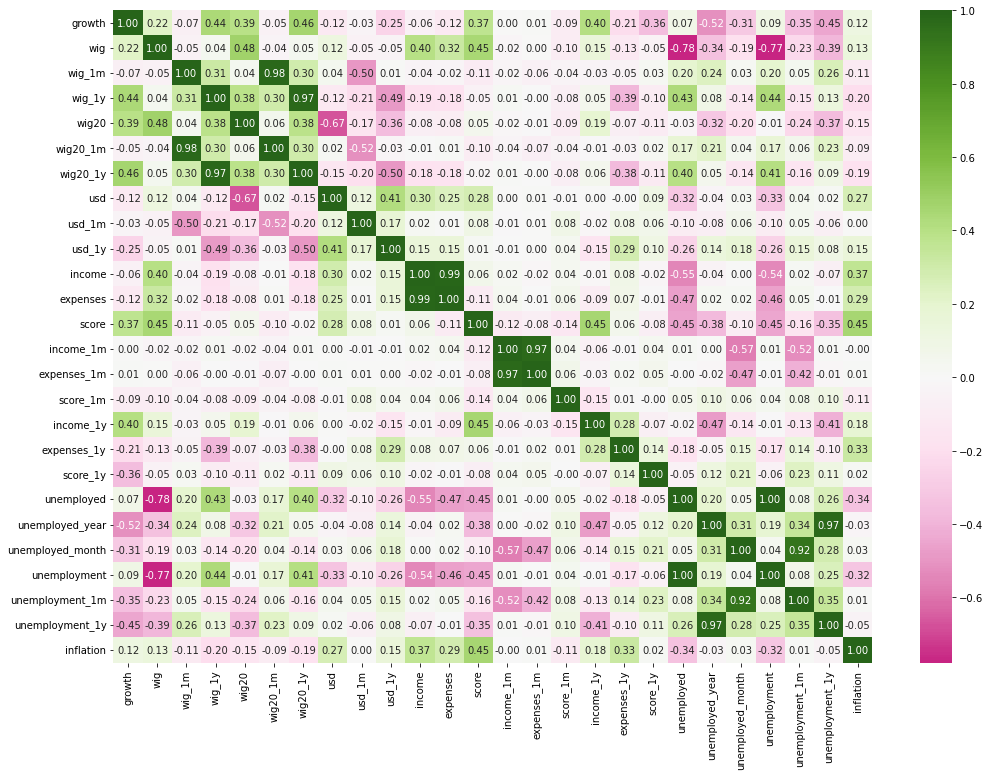

In [35]:
f, ax = plt.subplots(figsize=(17, 12))
ax = sb.heatmap(small_data.corr(), center=0, cmap="PiYG", annot=True, fmt=".2f")

From the correlation matrix we can notice quite a few things, most of which were easily predictable such as:
    
    - Number of unemployed people is extremly correlated with unemployment. This is because there were little changes in population during the period which the dataset covers
    - income and expenses in national budget are strongly correlated
There are also some less-obvious things:
    
    - The scores of national budget are high when the income for the national budget is higher than in respective month in previous year. 
    - The wig index is strongly negatively correlated with unemployment
    - Larger national budget also seems to reduce unemployment
    - The wig20 index is negatively correlated with the prices of USD

We can also see that variables concerning national budget, unemployment, and price of USD seem to affect inflation the most

In [43]:
standardized_small_data = small_data.copy()
months = standardized_small_data["month"]
standardized_small_data = standardized_small_data.set_index('month')
scaler = StandardScaler()
standardized_small_data = scaler.fit_transform(standardized_small_data)
standardized_small_data

array([[-6.47822373e-01, -2.40540103e+00, -1.84784612e-01, ...,
         5.18118364e+00,  1.42955204e+00, -7.14687378e-01],
       [-6.47822373e-01, -2.45451081e+00, -1.01364436e+00, ...,
         3.33659603e-01,  1.42376109e+00, -7.14687378e-01],
       [-6.47822373e-01, -2.45702825e+00, -1.84514016e-01, ...,
        -2.67992819e-03,  1.38183462e+00, -6.83826462e-01],
       ...,
       [-6.08855614e-01,  8.05535814e-02, -7.76103857e-01, ...,
         1.65082647e-01, -6.59060670e-01,  4.65511200e+00],
       [-6.08855614e-01,  6.21983818e-01,  2.81986684e+00, ...,
         1.65082647e-01, -5.45337264e-01,  4.53166833e+00],
       [-6.08855614e-01,  7.81727599e-01,  6.20500625e-01, ...,
         8.46001334e-01, -4.13774892e-01,  4.25392009e+00]])

In [44]:
standardized_small_data[:,0]

array([-0.64782237, -0.64782237, -0.64782237, -0.02435422, -0.02435422,
       -0.02435422,  0.32634661,  0.32634661,  0.32634661,  0.32634661,
        0.32634661,  0.32634661,  1.22258207,  1.22258207,  1.22258207,
        0.87188124,  0.87188124,  0.87188124,  0.36531337,  0.36531337,
        0.36531337,  0.40428013,  0.40428013,  0.40428013, -0.68678913,
       -0.68678913, -0.68678913, -0.41402182, -0.41402182, -0.41402182,
       -0.06332098, -0.06332098, -0.06332098,  0.17047957,  0.17047957,
        0.17047957,  0.59911392,  0.59911392,  0.59911392,  0.94981476,
        0.94981476,  0.94981476,  1.06671504,  1.06671504,  1.06671504,
        1.06671504,  1.06671504,  1.06671504,  1.37844911,  1.37844911,
        1.37844911,  1.02774828,  1.02774828,  1.02774828,  1.02774828,
        1.02774828,  1.02774828,  1.02774828,  1.02774828,  1.02774828,
        0.87188124,  0.87188124,  0.87188124,  0.83291448,  0.83291448,
        0.83291448,  0.44324689,  0.44324689,  0.44324689, -0.33

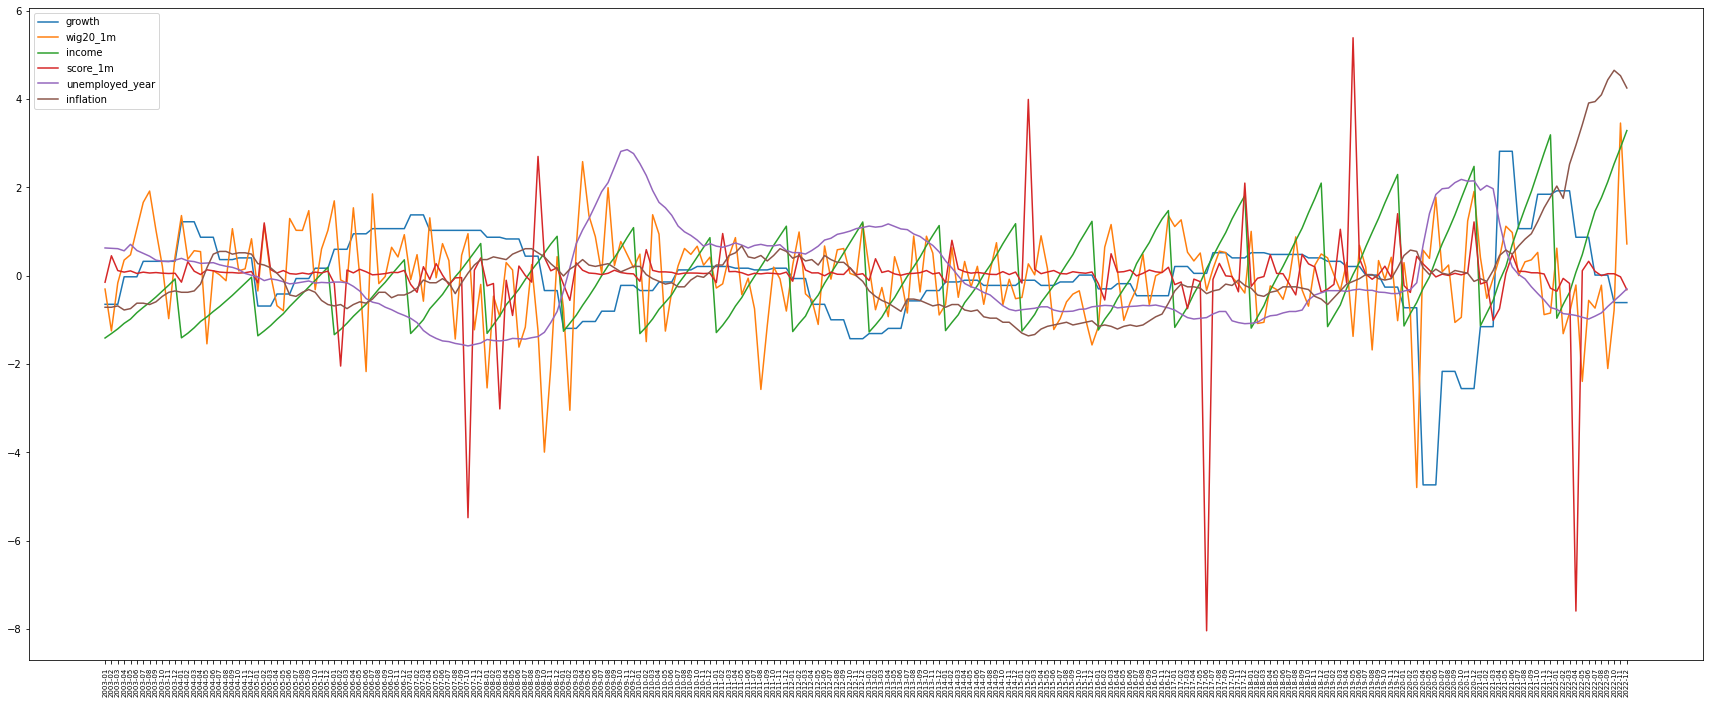

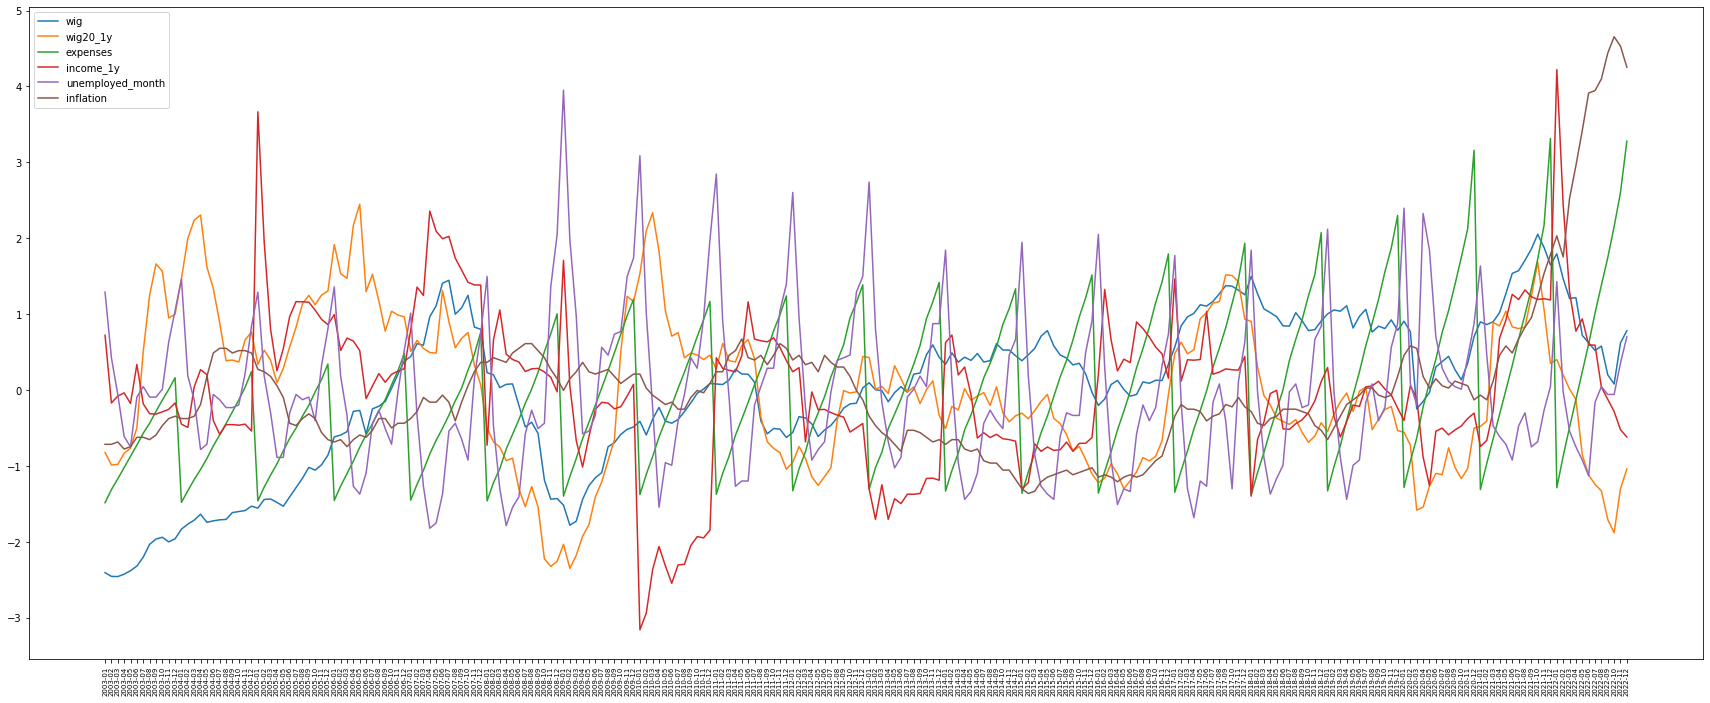

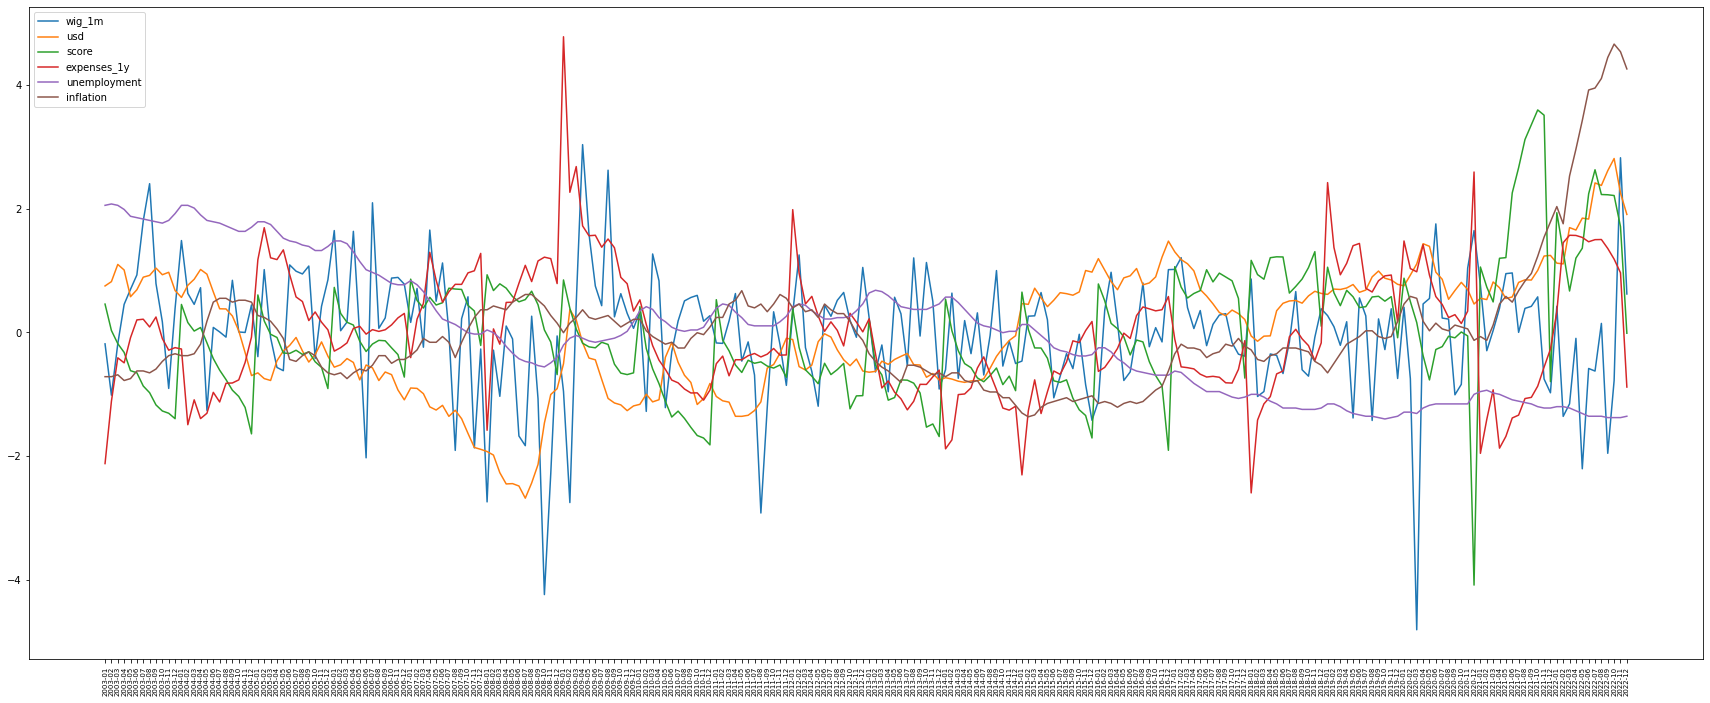

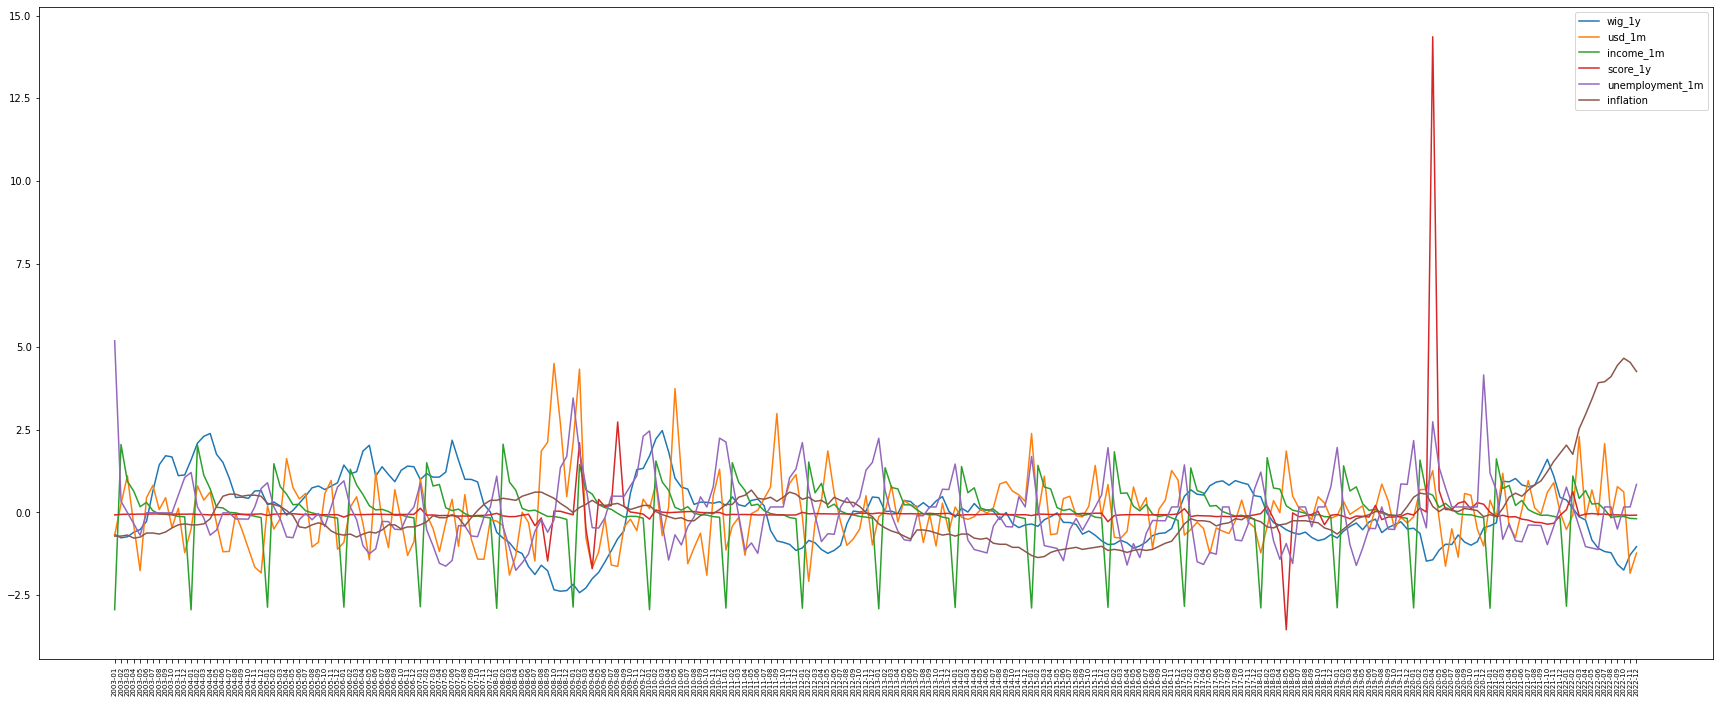

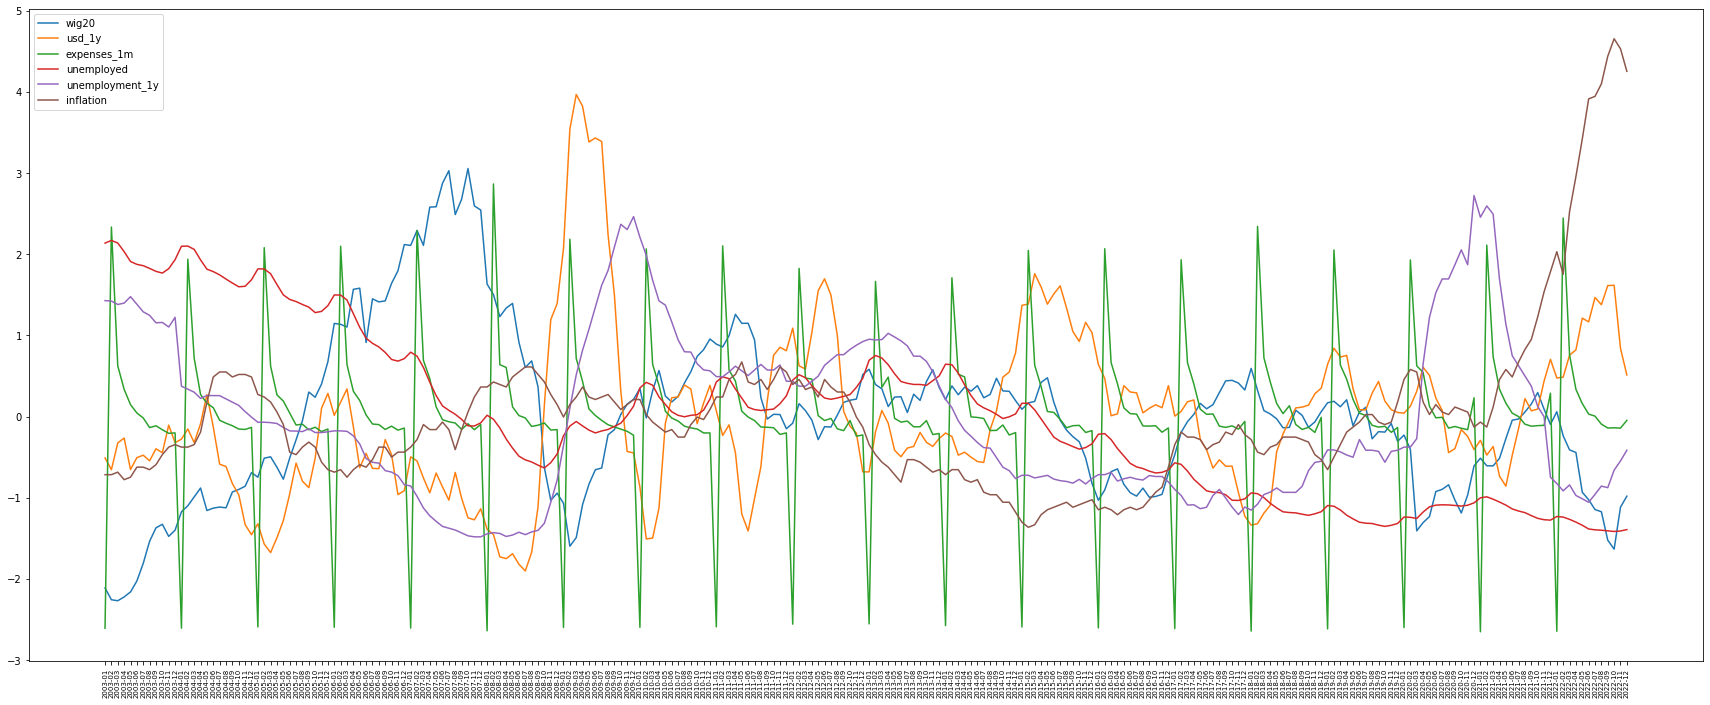

In [71]:
f, ax1 = plt.subplots(figsize=(30, 12))
f, ax2 = plt.subplots(figsize=(30, 12))
f, ax3 = plt.subplots(figsize=(30, 12))
f, ax4 = plt.subplots(figsize=(30, 12))
f, ax5 = plt.subplots(figsize=(30, 12))

axes = [ax1, ax2, ax3, ax4, ax5]

col_names = list(small_data.columns)
col_names.remove("month")
for index,name in enumerate(col_names):
    if index == 25:
        break
    axes[index%5].plot(standardized_small_data[:,index], label = name)

ax1.plot(standardized_small_data[:,-1], label = "inflation")
ax2.plot(standardized_small_data[:,-1], label = "inflation")
ax3.plot(standardized_small_data[:,-1], label = "inflation")
ax4.plot(standardized_small_data[:,-1], label = "inflation")
ax5.plot(standardized_small_data[:,-1], label = "inflation")
ax1.set_xticks(ticks = range(len(months)))
ax1.set_xticklabels(months,rotation="vertical",fontsize="x-small")
ax2.set_xticks(ticks = range(len(months)))
ax2.set_xticklabels(months,rotation="vertical",fontsize="x-small")
ax3.set_xticks(ticks = range(len(months)))
ax3.set_xticklabels(months,rotation="vertical",fontsize="x-small")
ax4.set_xticks(ticks = range(len(months)))
ax4.set_xticklabels(months,rotation="vertical",fontsize="x-small")
ax5.set_xticks(ticks = range(len(months)))
ax5.set_xticklabels(months,rotation="vertical",fontsize="x-small")
ax1.legend()
ax2.legend()
ax3.legend()
ax4.legend()
ax5.legend()

From the plots we can see that income and expenses of national budget are highly seasonal: the government seems to gather and spend the smallest amount of money at the beginning of the year, then budget increases in the linear fashion throught the year until december, only to fall again at the beginning of the year.

Unemployment also seems to show some seasonality, as it usually peaks around months of February and January

[Text(0, 0, '2003-01'),
 Text(1, 0, '2003-02'),
 Text(2, 0, '2003-03'),
 Text(3, 0, '2003-04'),
 Text(4, 0, '2003-05'),
 Text(5, 0, '2003-06'),
 Text(6, 0, '2003-07'),
 Text(7, 0, '2003-08'),
 Text(8, 0, '2003-09'),
 Text(9, 0, '2003-10'),
 Text(10, 0, '2003-11'),
 Text(11, 0, '2003-12'),
 Text(12, 0, '2004-01'),
 Text(13, 0, '2004-02'),
 Text(14, 0, '2004-03'),
 Text(15, 0, '2004-04'),
 Text(16, 0, '2004-05'),
 Text(17, 0, '2004-06'),
 Text(18, 0, '2004-07'),
 Text(19, 0, '2004-08'),
 Text(20, 0, '2004-09'),
 Text(21, 0, '2004-10'),
 Text(22, 0, '2004-11'),
 Text(23, 0, '2004-12'),
 Text(24, 0, '2005-01'),
 Text(25, 0, '2005-02'),
 Text(26, 0, '2005-03'),
 Text(27, 0, '2005-04'),
 Text(28, 0, '2005-05'),
 Text(29, 0, '2005-06'),
 Text(30, 0, '2005-07'),
 Text(31, 0, '2005-08'),
 Text(32, 0, '2005-09'),
 Text(33, 0, '2005-10'),
 Text(34, 0, '2005-11'),
 Text(35, 0, '2005-12'),
 Text(36, 0, '2006-01'),
 Text(37, 0, '2006-02'),
 Text(38, 0, '2006-03'),
 Text(39, 0, '2006-04'),
 Text(40, 

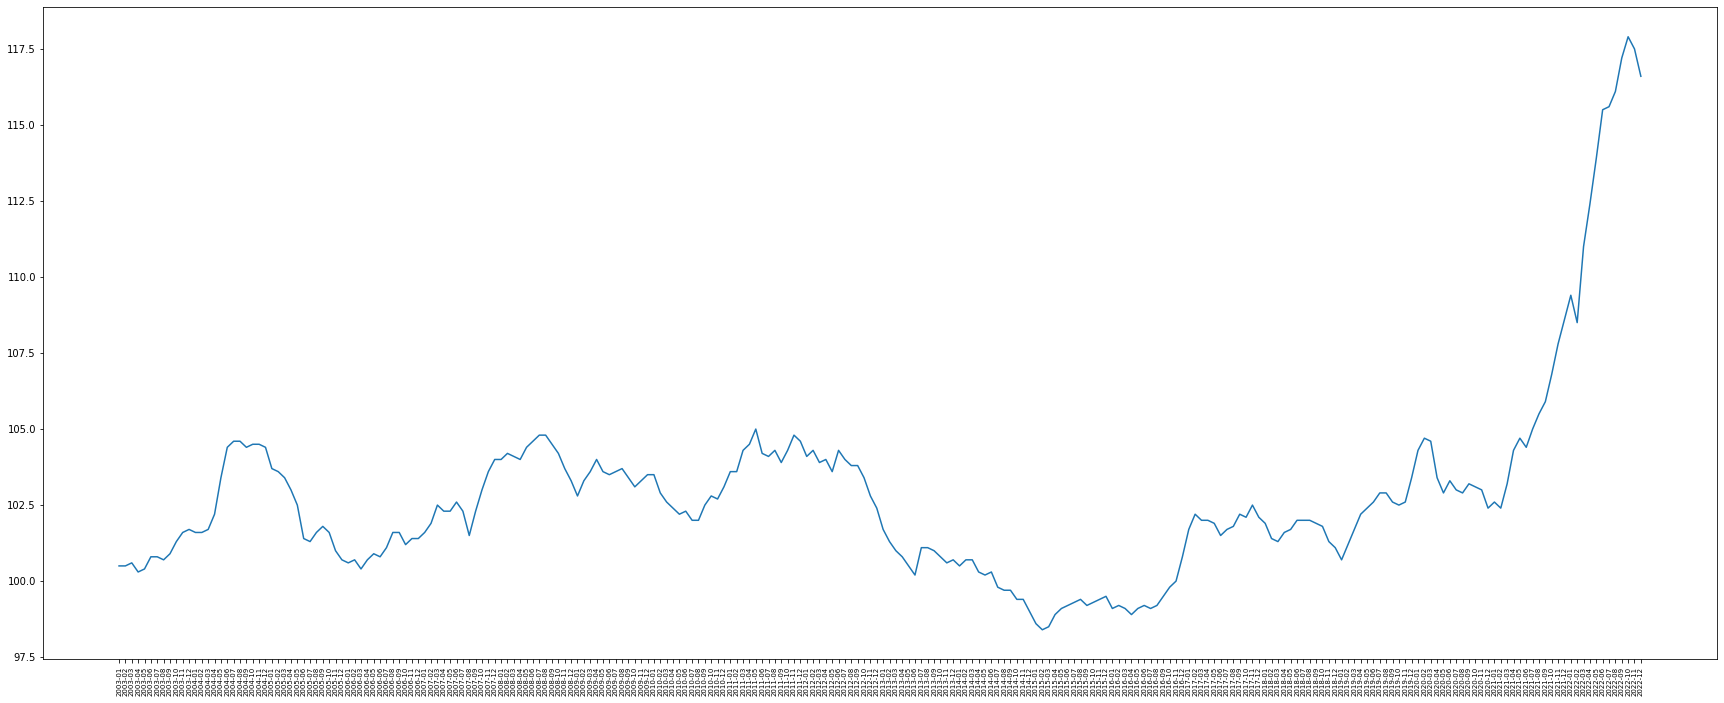

In [77]:
f, ax = plt.subplots(figsize=(30, 12))
ax.plot(list(small_data["inflation"]))
ax.set_xticks(ticks = range(len(months)))
ax.set_xticklabels(months,rotation="vertical",fontsize="x-small")

An attempt to cluster the data has been undertaken to see of there are some months which differ from the others

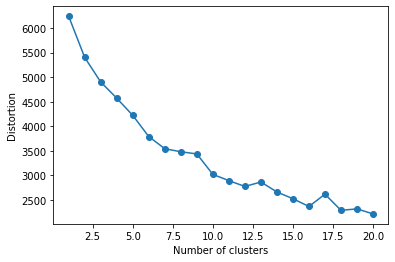

In [90]:
#source: https://towardsdatascience.com/k-means-clustering-with-scikit-learn-6b47a369a83c
X = standardized_small_data
distortions = []
for i in range(1, 21):
    km = KMeans(n_clusters=i,n_init='auto')
    km.fit(X)
    distortions.append(km.inertia_)

plt.plot(range(1, 21), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [95]:
kmeans = KMeans(n_clusters=7,n_init='auto')
result = kmeans.fit_predict(standardized_small_data)

for index in range(7):
    print(index)
    print(list(months[result == index]))

0
['2006-02', '2006-03', '2006-04', '2006-05', '2006-06', '2006-07', '2006-08', '2006-09', '2006-10', '2006-11', '2006-12', '2007-02', '2007-03', '2007-04', '2007-05', '2007-06', '2007-07', '2007-08', '2007-09', '2007-10', '2007-11', '2007-12', '2008-02', '2008-03', '2008-04', '2008-05', '2011-02', '2011-03', '2011-04', '2011-05', '2011-06', '2011-07', '2014-02', '2014-03', '2014-04', '2014-05', '2014-06']
1
['2008-06', '2008-07', '2008-08', '2008-09', '2008-10', '2008-11', '2008-12', '2009-02', '2011-08', '2011-09', '2012-03', '2012-04', '2012-05', '2014-07', '2014-08', '2014-09', '2014-10', '2014-11', '2014-12', '2015-02', '2015-03', '2015-04', '2015-05', '2015-06', '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12', '2016-02', '2016-03', '2016-04', '2016-05', '2016-06', '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2018-02', '2018-03', '2019-02', '2019-03', '2019-05', '2019-08', '2020-02', '2020-03']
2
['2009-03', '2009-04', '2009-05', '2009-06', '2009-07', '

Firstly, the data has been divided into 7 cluster as suggested by the elbow method. We can see that the cluster #5 contains all records from January, it looks like its the only distinguishable month as other clusters contain data from different months. It looks like each cluster contains data for around 3-4 consecutive years, with small amount of exceptions. This means that the economy tends to be in a similair state for a couple of years, rather than constantly change according to time of year. Cluster #6 is also interesting as it contains exclusively data for months in 2022. Thus, it would appear that 2022 was the most unique year for economy out of all presented here.  

In [101]:
kmeans = KMeans(n_clusters=12,n_init='auto')
result = kmeans.fit_predict(standardized_small_data)

for index in range(12):
    print(index)
    print(list(months[result == index]))

0
['2016-11', '2016-12', '2017-07', '2017-08', '2017-09', '2017-10', '2017-11', '2017-12', '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12', '2019-05', '2019-06', '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12', '2021-04', '2021-05', '2021-06', '2021-07', '2021-08', '2021-09', '2021-10', '2021-11', '2021-12']
1
['2003-02', '2003-03', '2003-04', '2003-05', '2003-06', '2003-07', '2003-08', '2003-09', '2003-10', '2003-11', '2003-12', '2004-02', '2004-03', '2004-04', '2004-05', '2004-06', '2004-07', '2004-08', '2004-09', '2004-10', '2004-11', '2004-12']
2
['2005-02', '2005-03', '2005-04', '2005-05', '2005-06', '2005-07', '2005-08', '2005-09', '2005-10', '2005-11', '2005-12', '2006-02', '2006-03', '2006-04', '2006-05', '2006-06', '2006-07', '2006-08', '2006-09', '2006-10', '2006-11', '2006-12', '2011-02', '2011-03', '2011-04', '2011-05', '2011-06', '2011-07', '2014-02']
3
['2020-05', '2020-06', '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12'

There has been an attempt to divide data into 12 clusters however, the conclusions are almost the same as with 7 clusters. However we can see that one cluster consists only of April 2020. This distinction likely comes from COVID-19 lockdowns which were introduced shortly before that month.

In [109]:
kmeans = KMeans(n_clusters=2,n_init='auto')
result = kmeans.fit_predict(standardized_small_data)

for index in range(2):
    print(index)
    print(list(months[result == index]))

0
['2008-06', '2008-07', '2008-08', '2008-09', '2008-10', '2008-11', '2008-12', '2009-01', '2009-02', '2009-03', '2009-04', '2009-05', '2009-06', '2009-07', '2009-08', '2009-09', '2011-08', '2011-09', '2011-10', '2011-11', '2011-12', '2012-01', '2012-04', '2012-05', '2012-06', '2012-07', '2014-10', '2014-11', '2014-12', '2015-06', '2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12', '2016-01', '2016-02', '2016-04', '2016-05', '2016-06', '2016-07', '2016-08', '2016-09', '2016-10', '2016-11', '2016-12', '2017-10', '2017-11', '2017-12', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08', '2018-09', '2018-10', '2018-11', '2018-12', '2019-01', '2019-02', '2019-03', '2019-04', '2019-05', '2019-06', '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12', '2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06', '2020-07', '2020-08', '2020-09', '2020-10', '2020-11', '2020-12', '2021-01', '2021-02', '2021-07', '2021-08', '2021-09', '2021-10', '2021-1

Data was also divided into 2 clusters.

Quite interestingly the second cluster contains data for months in which the economy was growing, and performing very well. On the other hand the first cluster contains data from more or less difficult times for the economy

In [89]:
reduced_data = small_data[["month","inflation","expenses","income","score","usd","expenses_1y","unemployed"]]
reduced_data

,month,inflation,expenses,income,score,usd,expenses_1y,unemployed
228,2003-01,100.5,15704.3,11665.3,-4039.0,3.830805,91.232463,3320.6
229,2003-02,100.5,33891.4,22254.6,-11636.8,3.866615,97.766662,3344.2
230,2003-03,100.6,48827.0,33396.9,-15430.1,4.009524,102.336724,3321.0
231,2003-04,100.3,64429.0,46475.0,-17954.0,3.963290,101.809143,3246.1
232,2003-05,100.4,79927.9,56710.3,-23217.6,3.741419,104.450194,3159.6
...,...,...,...,...,...,...,...,...
7,2022-08,116.1,317580.0,345107.4,27527.4,4.665650,114.759068,806.9
8,2022-09,117.2,355676.1,383133.5,27457.5,4.788236,113.819484,801.7
9,2022-10,117.9,398701.3,425936.0,27234.7,4.889443,112.698352,796.0
10,2022-11,117.5,446252.4,464528.6,18276.2,4.602995,111.267407,800.2


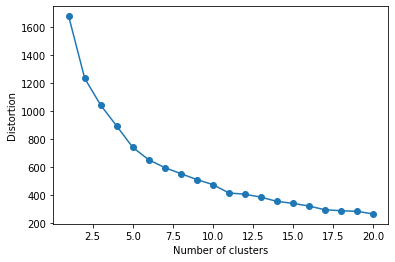

In [99]:
standardized_reduced_data = reduced_data.copy()
standardized_reduced_data = standardized_reduced_data.set_index('month')
scaler = StandardScaler()
standardized_reduced_data = scaler.fit_transform(standardized_reduced_data)
X = standardized_reduced_data
distortions = []
for i in range(1, 21):
    km = KMeans(n_clusters=i,n_init='auto')
    km.fit(X)
    distortions.append(km.inertia_)

plt.plot(range(1, 21), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

A clusterisation on reduced dataset which would only contain columns most correlated with inflation was considered, however it seems that distortion doesn't really reduce suddenly so data is likely not suitable for clustering.

## Price data summary 

In [3]:
prices_data = prices.copy()
prices_data["inflation"] = prices_data["Wskaźniki cen towarów i usług konsumpcyjnych nan analogiczny okres roku poprzedniego=100"]
del prices_data["Wskaźniki cen towarów i usług konsumpcyjnych nan analogiczny okres roku poprzedniego=100"]
for col_name in prices_data.columns:
    if col_name == "month":
        continue
    prices_data[col_name] = pd.to_numeric(prices_data[col_name])   
prices_data

,Wskaźniki cen skupu pszenicy (bez ziarna siewnego) analogiczny okres roku poprzedniego=100,Wskaźniki cen skupu pszenicy (bez ziarna siewnego) okres poprzedni=100,Wskaźniki cen skupu żyta (bez ziarna siewnego) analogiczny okres roku poprzedniego=100,Wskaźniki cen skupu żyta (bez ziarna siewnego) okres poprzedni=100,Wskaźniki cen skupu bydła (bez cieląt) analogiczny okres roku poprzedniego=100,Wskaźniki cen skupu bydła (bez cieląt) okres poprzedni=100,Wskaźniki cen skupu trzody chlewnej analogiczny okres roku poprzedniego=100,Wskaźniki cen skupu trzody chlewnej okres poprzedni=100,Wskaźniki cen skupu mleka analogiczny okres roku poprzedniego=100,Wskaźniki cen skupu mleka okres poprzedni=100,...,Wskaźniki cen towarów i usług konsumpcyjnych transport analogiczny okres roku poprzedniego=100,Wskaźniki cen towarów i usług konsumpcyjnych transport okres poprzedni=100,Wskaźniki cen towarów i usług konsumpcyjnych łączność analogiczny okres roku poprzedniego=100,Wskaźniki cen towarów i usług konsumpcyjnych łączność okres poprzedni=100,Wskaźniki cen towarów i usług konsumpcyjnych rekreacja i kultura analogiczny okres roku poprzedniego=100,Wskaźniki cen towarów i usług konsumpcyjnych rekreacja i kultura okres poprzedni=100,Wskaźniki cen towarów i usług konsumpcyjnych edukacja analogiczny okres roku poprzedniego=100,Wskaźniki cen towarów i usług konsumpcyjnych edukacja okres poprzedni=100,month,inflation
3,123.0,109.1,135.4,108.0,102.2,101.6,128.8,98.8,120.4,102.3,...,124.7,102.0,107.6,107.6,110.9,102.1,113.9,100.3,2000-01,110.1
4,127.8,102.2,135.1,101.1,103.2,102.5,107.1,98.0,124.6,102.5,...,125.8,101.4,107.1,99.8,110.4,100.6,113.8,100.3,2000-02,110.4
5,125.9,100.6,134.7,99.5,104.3,102.2,114.5,104.0,126.9,102.5,...,126.6,102.4,109.4,102.1,110.2,100.4,113.5,100.2,2000-03,110.3
6,125.3,100.8,133.2,98.9,106.3,100.7,119.0,105.2,128.1,100.8,...,122.5,99.7,102.0,94.4,110.0,100.4,113.3,100.1,2000-04,109.8
7,133.4,108.2,138.0,103.9,108.2,100.0,125.9,104.1,130.9,98.9,...,122.7,102.2,99.3,100.0,109.6,100.4,113.0,100.1,2000-05,110.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278,111.6,95.7,104.6,93.2,116.4,100.6,170.8,106.0,149.6,101.9,...,113.3,100.0,104.9,99.9,114.7,101.2,113.8,100.2,2022-12,116.6
279,105.2,91.8,97.4,93.2,113.6,99.8,167.2,96.4,134.2,89.1,...,116.5,98.8,106.3,101.4,116.7,102.4,113.9,101.4,2023-01,116.6
280,102.0,95.8,91.7,94.1,112.0,100.3,190.2,110.3,123.4,92.6,...,123.7,101.1,107.8,102.9,116.0,102.3,114.0,100.7,2023-02,118.4
281,77.5,91.2,80.4,95.6,101.2,98.8,131.2,102.9,113.3,97.9,...,103.9,99.1,109.4,101.7,116.4,99.7,114.1,100.5,2023-03,116.1


In [106]:
prices_data.describe()

,Wskaźniki cen skupu pszenicy (bez ziarna siewnego) analogiczny okres roku poprzedniego=100,Wskaźniki cen skupu pszenicy (bez ziarna siewnego) okres poprzedni=100,Wskaźniki cen skupu żyta (bez ziarna siewnego) analogiczny okres roku poprzedniego=100,Wskaźniki cen skupu żyta (bez ziarna siewnego) okres poprzedni=100,Wskaźniki cen skupu bydła (bez cieląt) analogiczny okres roku poprzedniego=100,Wskaźniki cen skupu bydła (bez cieląt) okres poprzedni=100,Wskaźniki cen skupu trzody chlewnej analogiczny okres roku poprzedniego=100,Wskaźniki cen skupu trzody chlewnej okres poprzedni=100,Wskaźniki cen skupu mleka analogiczny okres roku poprzedniego=100,Wskaźniki cen skupu mleka okres poprzedni=100,...,Wskaźniki cen towarów i usług konsumpcyjnych zdrowie okres poprzedni=100,Wskaźniki cen towarów i usług konsumpcyjnych transport analogiczny okres roku poprzedniego=100,Wskaźniki cen towarów i usług konsumpcyjnych transport okres poprzedni=100,Wskaźniki cen towarów i usług konsumpcyjnych łączność analogiczny okres roku poprzedniego=100,Wskaźniki cen towarów i usług konsumpcyjnych łączność okres poprzedni=100,Wskaźniki cen towarów i usług konsumpcyjnych rekreacja i kultura analogiczny okres roku poprzedniego=100,Wskaźniki cen towarów i usług konsumpcyjnych rekreacja i kultura okres poprzedni=100,Wskaźniki cen towarów i usług konsumpcyjnych edukacja analogiczny okres roku poprzedniego=100,Wskaźniki cen towarów i usług konsumpcyjnych edukacja okres poprzedni=100,inflation
count,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,...,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000,280.000000
mean,109.316071,100.505000,111.445000,100.597857,107.356429,100.554286,106.117500,100.573571,107.385357,100.433929,...,100.272857,103.727857,100.260357,100.526429,100.071786,102.418571,100.200714,103.425000,100.267143,103.398929
std,30.242227,6.268037,36.207102,7.152441,15.405374,3.254076,21.566528,6.450202,16.420942,2.901012,...,0.468253,8.153892,1.915986,3.532118,1.172546,3.639146,0.724531,3.580265,0.817544,3.759323
min,52.900000,68.600000,49.000000,71.600000,88.600000,92.100000,63.200000,87.200000,67.300000,89.100000,...,97.400000,87.200000,94.900000,88.300000,94.400000,96.900000,97.600000,93.700000,93.100000,98.400000
25%,88.275000,98.175000,89.375000,97.675000,97.400000,98.800000,91.050000,96.500000,97.050000,98.800000,...,100.100000,98.375000,99.375000,98.800000,99.900000,100.500000,99.800000,101.700000,100.000000,101.200000
50%,103.100000,100.600000,104.650000,100.800000,102.650000,100.400000,100.300000,100.100000,105.050000,100.250000,...,100.200000,102.750000,100.300000,100.000000,100.000000,101.700000,100.100000,102.800000,100.100000,102.600000
75%,125.925000,102.725000,127.050000,103.500000,111.250000,101.800000,121.000000,103.900000,117.950000,102.325000,...,100.400000,107.600000,101.100000,102.100000,100.025000,103.000000,100.500000,104.800000,100.300000,104.225000
max,211.600000,123.400000,241.000000,124.400000,161.500000,119.900000,190.200000,149.200000,160.300000,108.600000,...,103.100000,133.400000,117.500000,109.700000,108.000000,116.700000,103.400000,114.100000,107.400000,118.400000


[Text(0, 0, '2000-01'),
 Text(1, 0, '2000-02'),
 Text(2, 0, '2000-03'),
 Text(3, 0, '2000-04'),
 Text(4, 0, '2000-05'),
 Text(5, 0, '2000-06'),
 Text(6, 0, '2000-07'),
 Text(7, 0, '2000-08'),
 Text(8, 0, '2000-09'),
 Text(9, 0, '2000-10'),
 Text(10, 0, '2000-11'),
 Text(11, 0, '2000-12'),
 Text(12, 0, '2001-01'),
 Text(13, 0, '2001-02'),
 Text(14, 0, '2001-03'),
 Text(15, 0, '2001-04'),
 Text(16, 0, '2001-05'),
 Text(17, 0, '2001-06'),
 Text(18, 0, '2001-07'),
 Text(19, 0, '2001-08'),
 Text(20, 0, '2001-09'),
 Text(21, 0, '2001-10'),
 Text(22, 0, '2001-11'),
 Text(23, 0, '2001-12'),
 Text(24, 0, '2002-01'),
 Text(25, 0, '2002-02'),
 Text(26, 0, '2002-03'),
 Text(27, 0, '2002-04'),
 Text(28, 0, '2002-05'),
 Text(29, 0, '2002-06'),
 Text(30, 0, '2002-07'),
 Text(31, 0, '2002-08'),
 Text(32, 0, '2002-09'),
 Text(33, 0, '2002-10'),
 Text(34, 0, '2002-11'),
 Text(35, 0, '2002-12'),
 Text(36, 0, '2003-01'),
 Text(37, 0, '2003-02'),
 Text(38, 0, '2003-03'),
 Text(39, 0, '2003-04'),
 Text(40, 

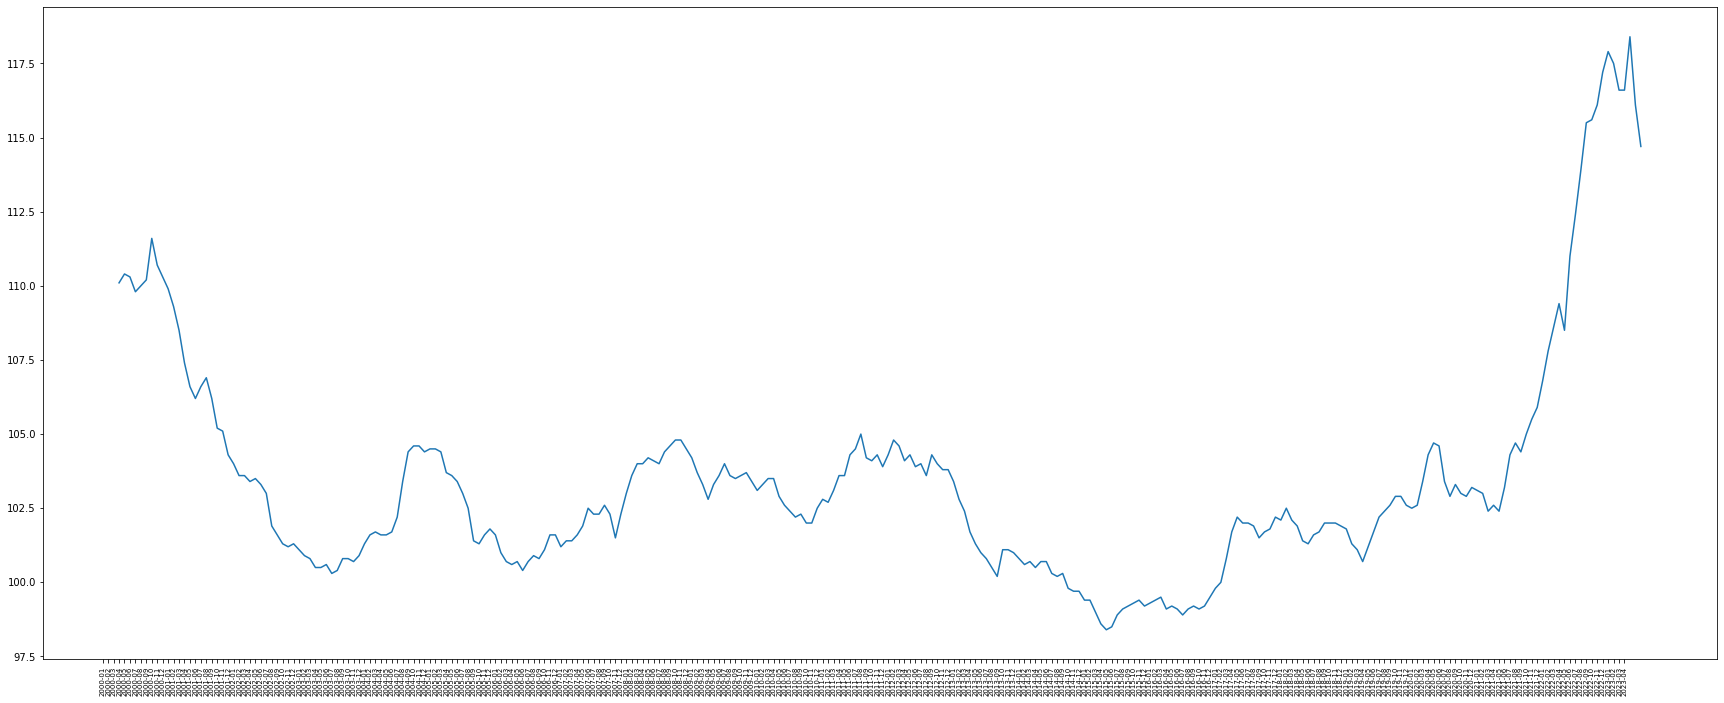

In [13]:
f, ax1 = plt.subplots(figsize=(30, 12))
ax1.plot(prices_data["inflation"], label = "inflation")
ax1.set_xticks(ticks = range(len(months)))
ax1.set_xticklabels(prices_data["month"],rotation="vertical",fontsize="x-small")

Data for prices have been obtained using similair methods for each column, so it can be easily analysed without standarization. However it would be preferrable to standardize the data before ML methods are applied. Especially if variables from the rest of the dataset will also be used.

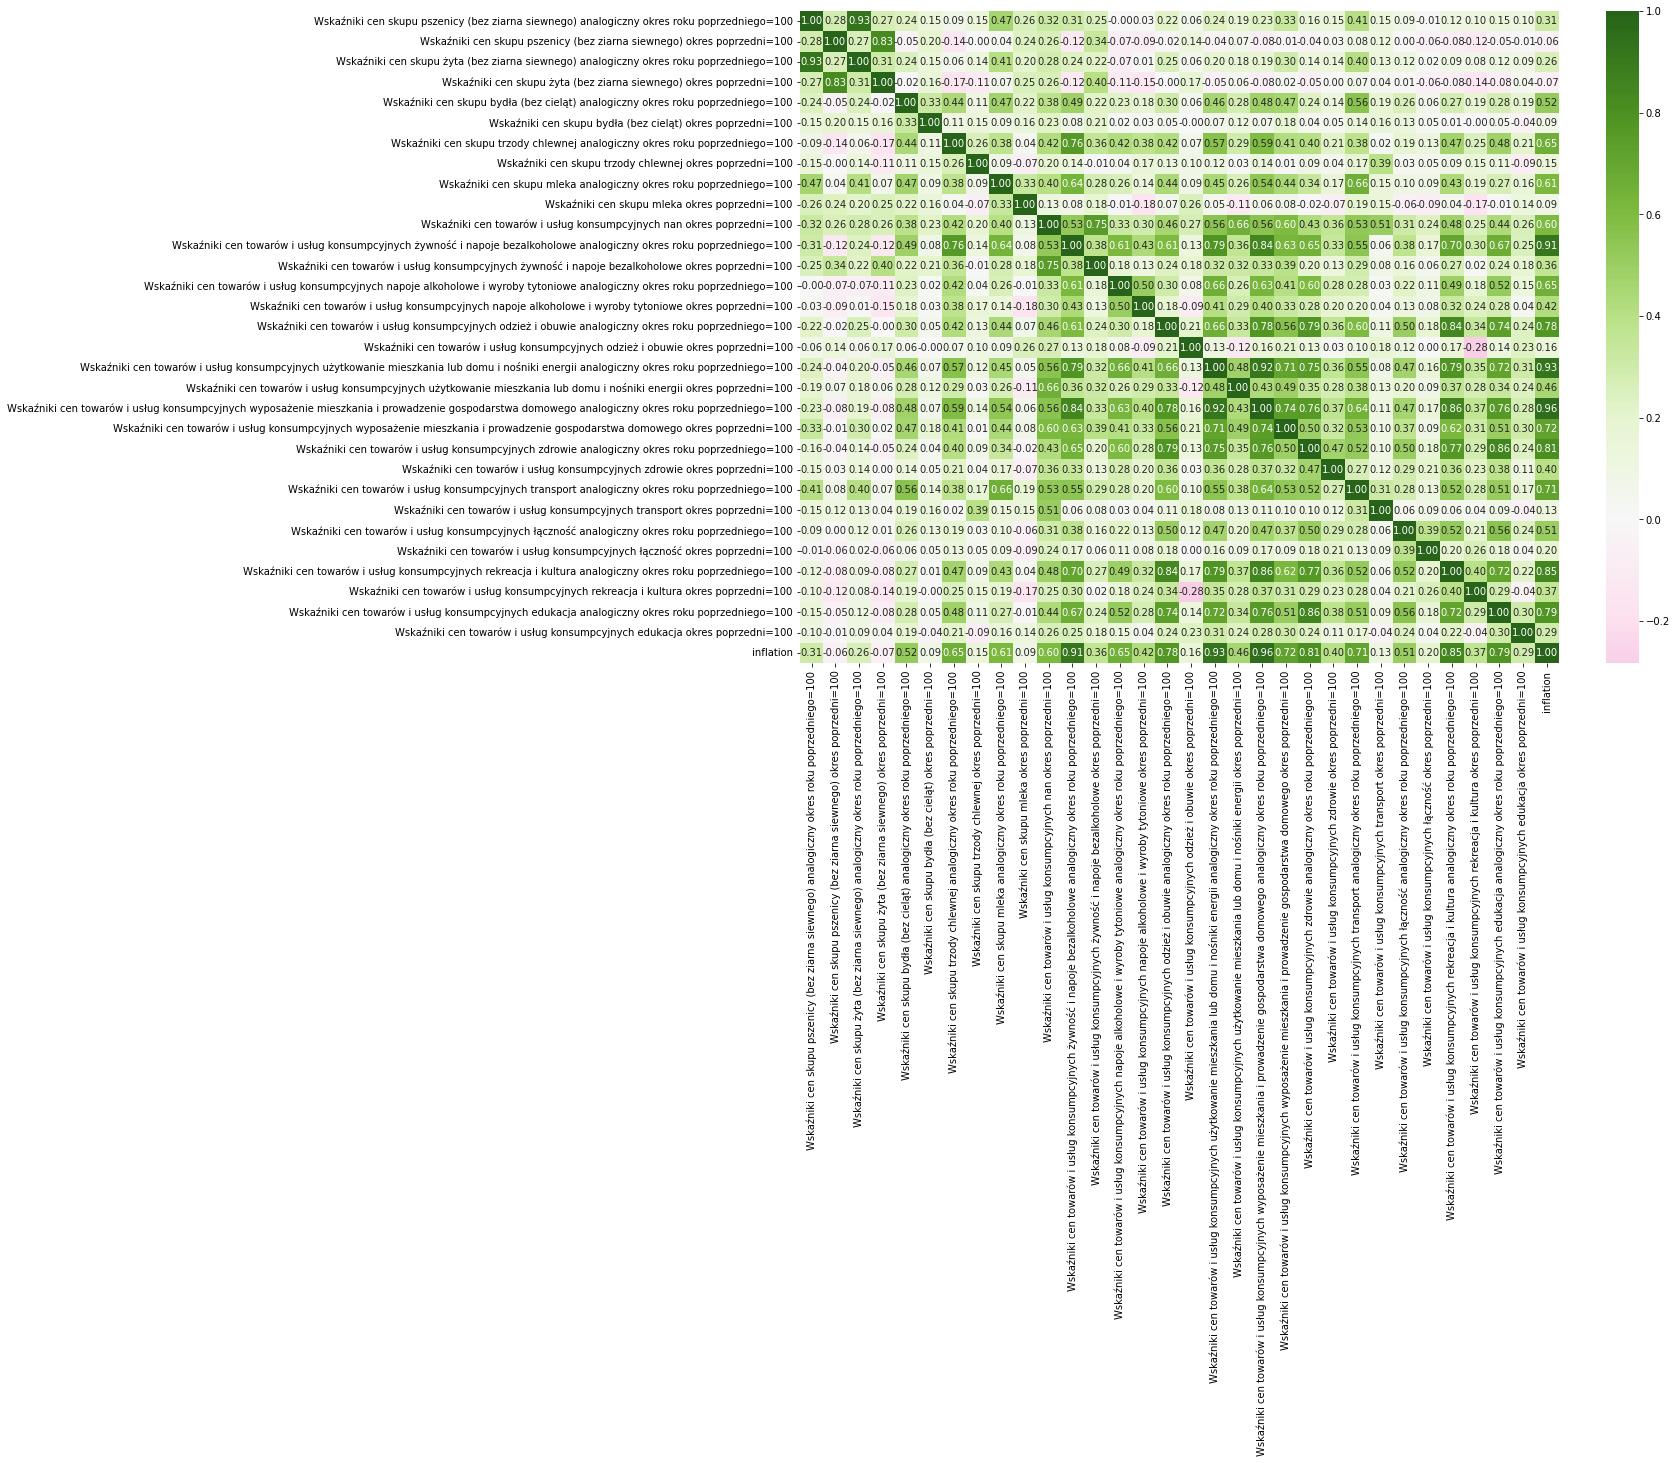

In [107]:
f, ax = plt.subplots(figsize=(17, 12))
ax = sb.heatmap(prices_data.corr(), center=0, cmap="PiYG", annot=True, fmt=".2f")

Unsuprisingly most of the price indicators are correlated with each other. Notable exception appear to be prices of clothes and shoes as they show very little correlation with other prices.

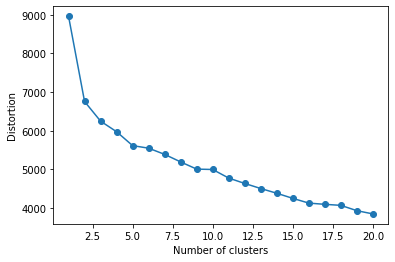

In [4]:
standardized_prices_data = prices_data.copy()
standardized_prices_data = standardized_prices_data.set_index('month')
scaler = StandardScaler()
standardized_prices_data = scaler.fit_transform(standardized_prices_data)
X = standardized_prices_data
distortions = []
for i in range(1, 21):
    km = KMeans(n_clusters=i,n_init='auto')
    km.fit(X)
    distortions.append(km.inertia_)

plt.plot(range(1, 21), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

It was decided to conduct kmeans clustering for 2 and 5 clusters for prices data

In [9]:
months = prices_data["month"]
kmeans = KMeans(n_clusters=2,n_init='auto')
result = kmeans.fit_predict(standardized_prices_data)

for index in range(2):
    print(index)
    print(list(months[result == index]))

0
['2001-02', '2001-03', '2001-04', '2001-06', '2001-07', '2001-08', '2001-09', '2001-10', '2001-11', '2001-12', '2002-01', '2002-02', '2002-03', '2002-04', '2002-05', '2002-06', '2002-07', '2002-08', '2002-09', '2002-10', '2002-11', '2002-12', '2003-01', '2003-02', '2003-03', '2003-04', '2003-05', '2003-06', '2003-07', '2003-08', '2003-09', '2003-10', '2003-11', '2003-12', '2004-01', '2004-02', '2004-03', '2004-04', '2004-05', '2004-06', '2004-07', '2004-08', '2004-09', '2004-10', '2004-11', '2004-12', '2005-01', '2005-02', '2005-03', '2005-04', '2005-05', '2005-06', '2005-07', '2005-08', '2005-09', '2005-10', '2005-11', '2005-12', '2006-01', '2006-02', '2006-03', '2006-04', '2006-05', '2006-06', '2006-07', '2006-08', '2006-09', '2006-10', '2006-11', '2006-12', '2007-01', '2007-02', '2007-03', '2007-04', '2007-05', '2007-06', '2007-07', '2007-08', '2007-09', '2007-10', '2007-11', '2007-12', '2008-01', '2008-02', '2008-03', '2008-04', '2008-05', '2008-06', '2008-07', '2008-08', '2008-0

Unsuprisingly, periods with highest growth in prices (early 2000s and early 2020s) were placed in different cluster than the rest of the data

In [7]:
kmeans = KMeans(n_clusters=5,n_init='auto')
result = kmeans.fit_predict(standardized_prices_data)

for index in range(5):
    print(index)
    print(list(months[result == index]))

0
['2003-11', '2003-12', '2004-01', '2004-02', '2004-03', '2004-04', '2004-05', '2004-06', '2004-09', '2004-10', '2006-08', '2006-09', '2007-01', '2007-02', '2007-03', '2007-04', '2007-05', '2007-08', '2007-09', '2007-10', '2007-11', '2007-12', '2008-01', '2008-02', '2008-03', '2008-04', '2009-11', '2009-12', '2010-01', '2010-06', '2010-08', '2010-09', '2010-10', '2010-11', '2010-12', '2011-01', '2011-02', '2011-03', '2011-04', '2011-05', '2011-06', '2011-09', '2011-10', '2012-09', '2012-10', '2016-12', '2017-09', '2017-10', '2017-11', '2018-09', '2019-04', '2020-09', '2020-10', '2020-11', '2020-12', '2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06', '2021-08', '2021-09', '2021-10', '2021-11', '2021-12']
1
['2001-07', '2001-08', '2002-05', '2002-06', '2002-07', '2002-08', '2003-07', '2003-08', '2004-07', '2004-08', '2005-06', '2005-07', '2005-08', '2006-07', '2007-06', '2007-07', '2008-06', '2008-07', '2008-08', '2009-08', '2010-03', '2011-07', '2011-08', '2012-07', '201

When divided into 5 clusters, data seems to be again gathered into sets of consecutive years. There are however a lot of exceptions, yet cluster #3 shows us clearly two periods with highest growth in prices

In [111]:
data

,month,growth,wig,wig_1m,wig_1y,wig20,wig20_1m,wig20_1y,usd,usd_1m,...,Wskaźniki cen towarów i usług konsumpcyjnych zdrowie okres poprzedni=100,Wskaźniki cen towarów i usług konsumpcyjnych transport analogiczny okres roku poprzedniego=100,Wskaźniki cen towarów i usług konsumpcyjnych transport okres poprzedni=100,Wskaźniki cen towarów i usług konsumpcyjnych łączność analogiczny okres roku poprzedniego=100,Wskaźniki cen towarów i usług konsumpcyjnych łączność okres poprzedni=100,Wskaźniki cen towarów i usług konsumpcyjnych rekreacja i kultura analogiczny okres roku poprzedniego=100,Wskaźniki cen towarów i usług konsumpcyjnych rekreacja i kultura okres poprzedni=100,Wskaźniki cen towarów i usług konsumpcyjnych edukacja analogiczny okres roku poprzedniego=100,Wskaźniki cen towarów i usług konsumpcyjnych edukacja okres poprzedni=100,inflation
228,2003-01,2.2,14501.390909,99.758368,92.895081,1182.224091,98.709599,84.840768,3.830805,97.883917,...,100.2,105.7,101.3,100.0,100.0,101.7,101.0,102.4,100.1,100.5
229,2003-02,2.2,13852.175000,95.523078,90.203868,1107.944000,93.716920,80.845211,3.866615,100.934802,...,100.2,107.5,101.7,100.0,100.0,101.6,100.1,102.4,100.1,100.5
230,2003-03,2.2,13818.895238,99.759751,91.043731,1101.812857,99.446620,81.021400,4.009524,103.695967,...,100.2,108.5,101.5,100.0,100.0,101.9,100.4,102.4,100.0,100.6
231,2003-04,3.8,14236.020000,103.018510,94.652201,1125.743500,102.171934,84.595694,3.963290,98.846912,...,100.1,106.5,99.5,100.0,100.0,101.9,100.0,102.4,100.0,100.3
232,2003-05,3.8,14842.295238,104.258741,96.847212,1157.359048,102.808415,86.214281,3.741419,94.401838,...,100.1,104.7,98.2,100.0,100.0,101.9,100.0,102.4,100.0,100.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,2022-08,3.9,53965.914545,101.445456,78.326615,1662.664545,99.173530,72.561395,4.665650,99.550351,...,100.6,119.5,94.9,104.3,100.0,112.6,101.1,106.9,100.2,116.1
8,2022-09,3.9,48962.650000,90.728843,69.092537,1483.501364,89.224334,63.348383,4.788236,102.627423,...,100.7,116.4,98.5,102.9,101.0,113.9,100.8,112.5,107.4,117.2
9,2022-10,2.3,47364.929048,96.736858,64.493467,1427.012381,96.192185,59.111930,4.889443,102.113649,...,100.7,117.3,103.1,103.3,100.0,114.8,100.7,113.5,102.0,117.9
10,2022-11,2.3,54522.466500,115.111471,76.647247,1691.497000,118.534150,73.247619,4.602995,94.141503,...,100.6,114.4,99.2,105.0,101.3,114.2,100.4,113.6,100.2,117.5


In [117]:
data.to_csv(r"C:\Users\Admin\Desktop\mio_projekt\data.csv", encoding="UTF-8")